<a href="https://colab.research.google.com/github/isahendriks/DeepLearningCrashCourse/blob/main/lecture1_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#%% Import packages
import os
if not os.path.exists("MNIST_dataset"):
    os.system("git clone http://github.com/DeepTrackAI/MNIST_dataset")


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import deeplay as dl
from torch.nn import Sigmoid

In [5]:
#  set paths
train_path = os.path.join("MNIST_dataset", "mnist", "train")
train_images_files = sorted(os.listdir(train_path))

In [6]:
# Load every 10th image
train_images = []

for i in range(0, len(train_images_files), 10):
    file = train_images_files[i]
    image = plt.imread(os.path.join(train_path,file))
    train_images.append(image)

In [7]:
# Load the digits every 10th image
train_digits = []
for i in range(0, len(train_images_files), 10):
    file  = train_images_files[i]
    filename = os.path.basename(file)
    digit = int(filename[0])
    train_digits.append(digit)

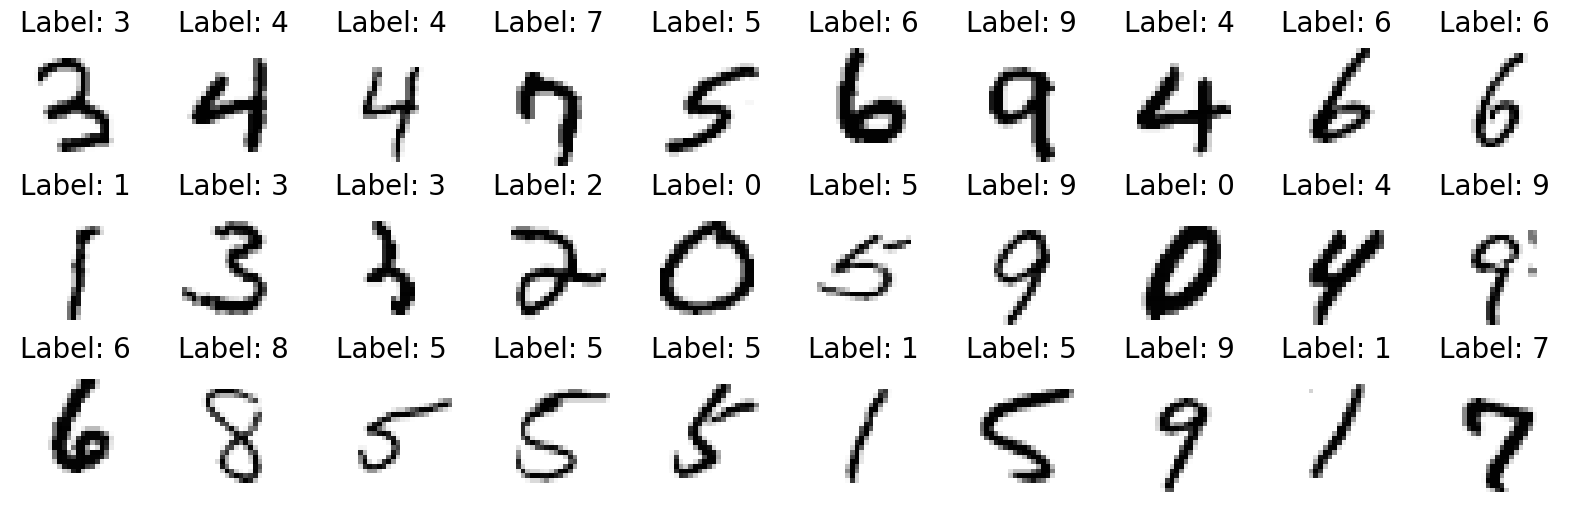

In [9]:
# Plot 30 random images

fig, axs = plt.subplots(nrows=3, ncols=10, figsize=(20,6))
for ax in axs.ravel():
    idx_image = np.random.choice(6000)
    ax.imshow(train_images[idx_image], cmap = "Greys")
    ax.set_title(f"Label: {train_digits[idx_image]}", fontsize=20)
    ax.axis("off")
plt.show()

In [10]:
# Make model on 6000 images
mlp_template = dl.MultiLayerPerceptron(
    in_features = 28*28, hidden_features=[32,32], out_features=10,
)
mlp_template[...,"activation"].configure(Sigmoid)
mlp_model = mlp_template.create()
print(mlp_model)

MultiLayerPerceptron(
  (blocks): LayerList(
    (0): LinearBlock(
      (layer): Linear(in_features=784, out_features=32, bias=True)
      (activation): Sigmoid()
    )
    (1): LinearBlock(
      (layer): Linear(in_features=32, out_features=32, bias=True)
      (activation): Sigmoid()
    )
    (2): LinearBlock(
      (layer): Linear(in_features=32, out_features=10, bias=True)
      (activation): Sigmoid()
    )
  )
)
